In [5]:
!pip install pandas numpy matplotlib seaborn scikit-learn category_encoders

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from category_encoders import OneHotEncoder

from google.colab import drive
drive.mount('/content/drive')

# define paths
data_path = "/content/drive/MyDrive/Kaggle_Backpack/data/raw/"
processed_path = "/content/drive/MyDrive/Kaggle_Backpack/data/processed/"

# LOAD DATA
# load training and test sets
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
train_extra_df = pd.read_csv(os.path.join(data_path, 'training_extra.csv'))
test_df = pd.read_csv(os.path.join(data_path, 'test.csv'))

print("Training Data Info:")
train_df.info()
print("\nExtra Training Data Info:")
train_extra_df.info()
print("\nTest Data Info:")
test_df.info()

train_df.head(), train_extra_df.head(), test_df.head()

# CHECK MISSING VALUES
print("\nMissing Values in Training Data:\n", train_df.isnull().sum())
print("\nMissing Values in Extra Training Data:\n", train_extra_df.isnull().sum())
print("\nMissing Values in Test Data:\n", test_df.isnull().sum())

# dataset shapes
print(f"Training Data Shape: {train_df.shape}")
print(f"Extra Training Data Shape: {train_extra_df.shape}")
print(f"Test Data Shape: {test_df.shape}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB



### Observations ###
- training_extra has signigicantly more records (3.69M) than training (300k) -> will be useful in improving model training
- soem categorical columns have substantial missing values
  - Brand: 9705 missing in train, 117, missing in train_extra
  - material, style, color
- train_extra has a higher proportion of missing vals
- considering:
  - mode imputation for categorical
  - mean/median imputation for numerical

<ipython-input-6-358742c2cf98>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df['Price'], label='Train', shade=True)
<ipython-input-6-358742c2cf98>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_extra_df['Price'], label='Train Extra', shade=True)


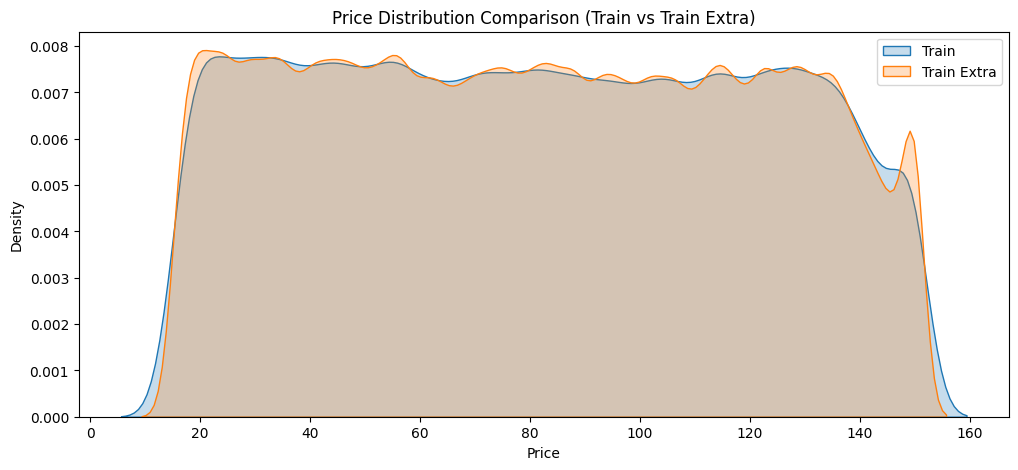

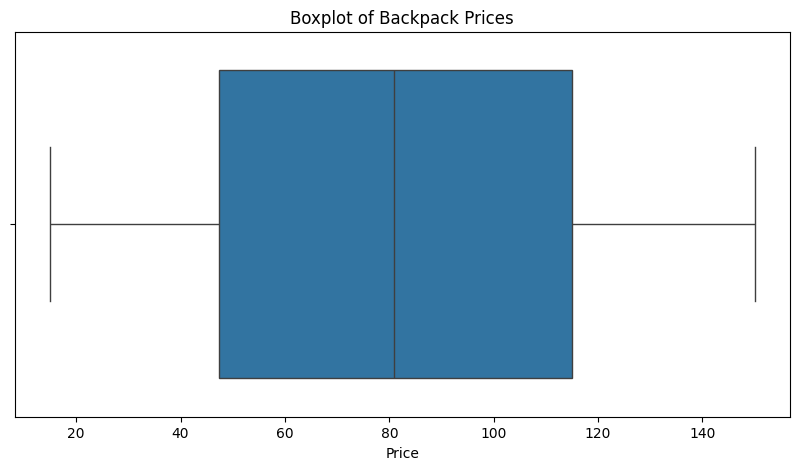

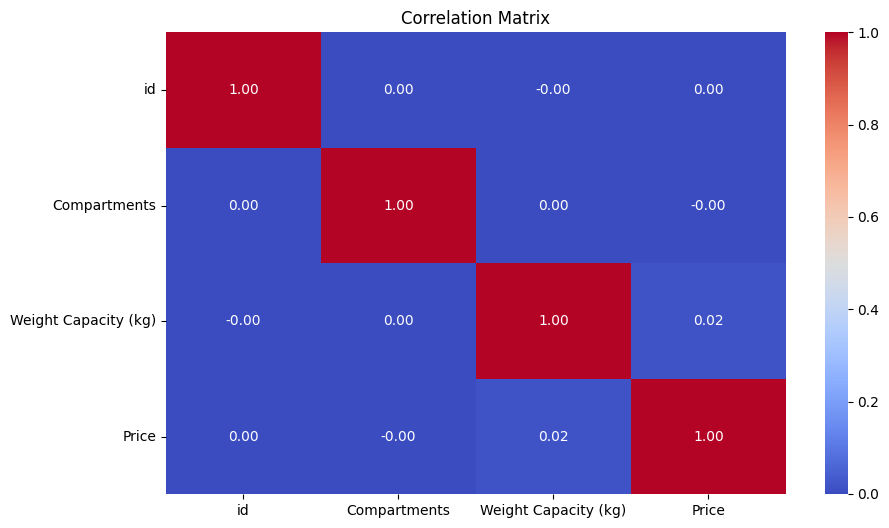

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


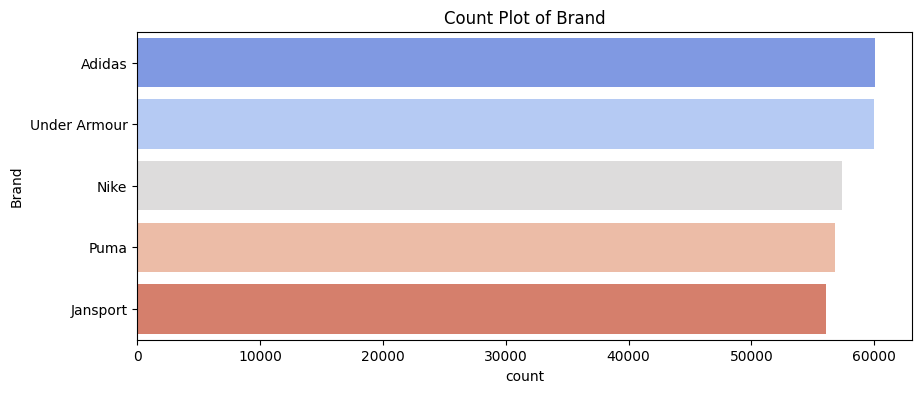

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


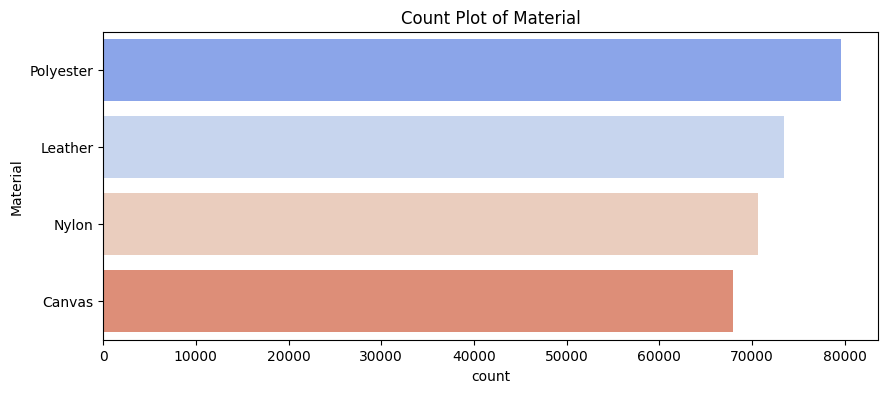

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


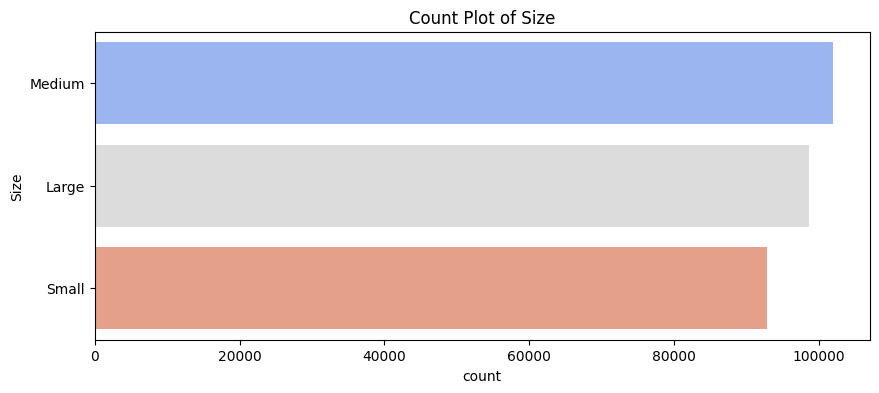

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


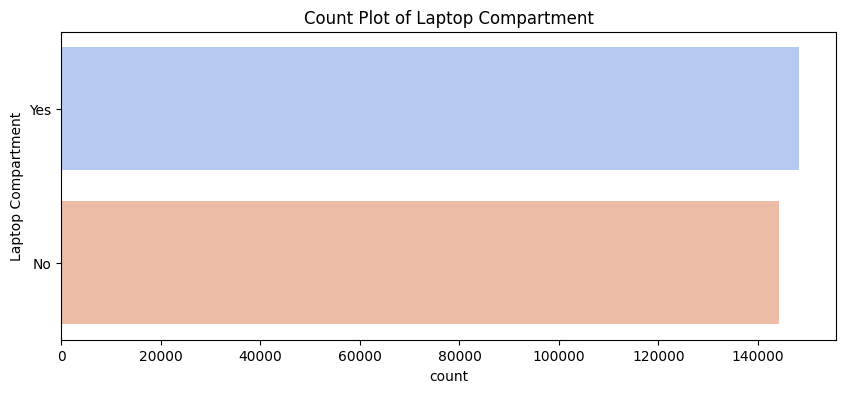

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


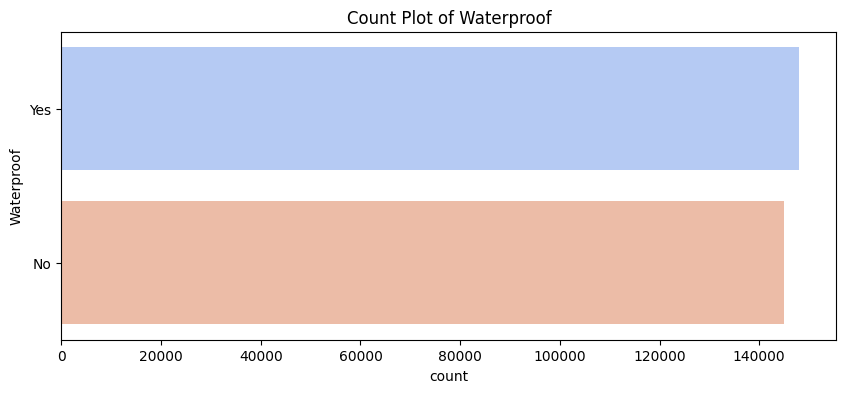

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


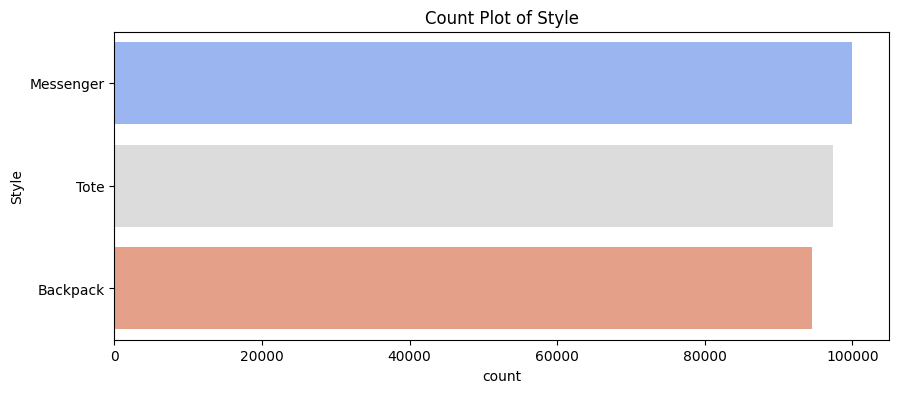

<ipython-input-6-358742c2cf98>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")


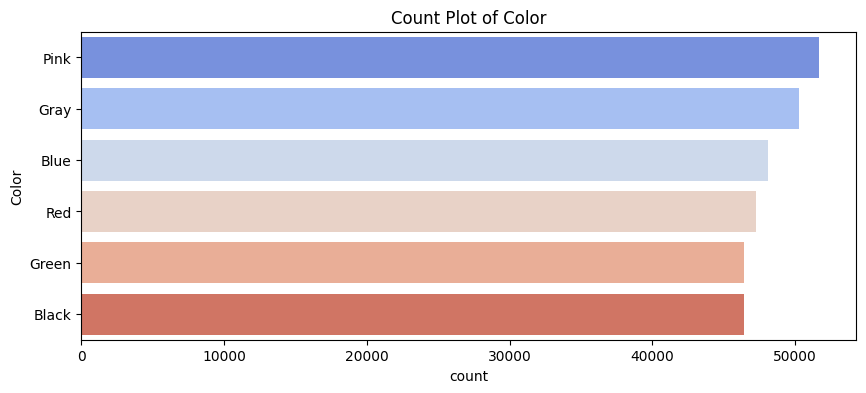

In [6]:
# EDA
# define numerical and categorical cols
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

# remove price
num_cols.remove('Price')

# feature distribution comparison train.csv vs train_extra.csv
plt.figure(figsize=(12, 5))
sns.kdeplot(train_df['Price'], label='Train', shade=True)
sns.kdeplot(train_extra_df['Price'], label='Train Extra', shade=True)
plt.legend()
plt.title("Price Distribution Comparison (Train vs Train Extra)")
plt.xlabel("Price")
plt.ylabel("Density")
plt.show()

# outlier boxplots
plt.figure(figsize=(10, 5))
sns.boxplot(x=train_df["Price"])
plt.title("Boxplot of Backpack Prices")
plt.show()

# correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = train_df[num_cols + ['Price']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# categorical feature distribution
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=train_df[col], order=train_df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Count Plot of {col}")
    plt.show()


### Observations ###
- Price Distribution (train vs train extra)
  - both datasets similarly distributed
- Outlier Analysis
  - slightly right-skewed distribution
  - consider removing outliers?
- Correlation Matrix
  - weight capacity slightly positively correlated with price (0.2)
  - categorical feature impact on price needs boxplots by category -> build this out
- Categorical Feature Dist
  - no glaring abnormalities

In [8]:
# FEATURE ENGINEERING

# combine train and train_extra
train_combined = pd.concat([train_df, train_extra_df], axis=0).reset_index(drop=True)

# fill categorical with mode, others forward fill
for col in cat_cols:
    train_combined[col].fillna(train_combined[col].mode()[0], inplace=True)
test_df.fillna(method='ffill', inplace=True)

for col in num_cols:
    train_combined[col].fillna(train_combined[col].median(), inplace=True)
test_df[num_cols] = test_df[num_cols].fillna(test_df[num_cols].median())

# one-hot encode (nominal categorical features)
ohe_cols = ['Brand', 'Color', 'Style']
train_encoded = pd.get_dummies(train_combined, columns=ohe_cols, drop_first=True)
test_encoded = pd.get_dummies(test_df, columns=ohe_cols, drop_first=True)

# ensure test set has same features as train
train_cols = train_encoded.columns
test_encoded = test_encoded.reindex(columns=train_cols, fill_value=0)

# ordinal feature label encoding
le_cols = ['Material', 'Size']
le = LabelEncoder()
for col in le_cols:
    train_encoded[col] = le.fit_transform(train_combined[col])
    test_encoded[col] = le.transform(test_df[col])

# feature engineering - interaction terms
train_encoded["Price_per_Compartment"] = train_encoded["Price"] / (train_encoded["Compartments"] + 1)
train_encoded["Has_Laptop_Compartment"] = train_encoded["Laptop Compartment"].apply(lambda x: 1 if x == "Yes" else 0)

# standardization (scale numerical features)
scaler = StandardScaler()
train_encoded[num_cols] = scaler.fit_transform(train_encoded[num_cols])
test_encoded[num_cols] = scaler.transform(test_encoded[num_cols])

# save processed data to drive
train_encoded.to_csv(os.path.join(processed_path, "train_final.csv"), index=False)
test_encoded.to_csv(os.path.join(processed_path, "test_final.csv"), index=False)

print("Feature engineering completed - processed files saved.")

<ipython-input-8-c7edc6abdf12>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_combined[col].fillna(train_combined[col].mode()[0], inplace=True)
<ipython-input-8-c7edc6abdf12>:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df.fillna(method='ffill', inplace=True)
<ipython-input-8-c7edc6abdf12>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method

Feature engineering completed - processed files saved.


### Observations ###
- merged train and train_extra
- OHE for brand, color and style
- label encoding for material and size
- added feature interactions
  - price_per_compartment, has_laptop_compartment
- mode imputation for categorical columns missing vals

In [9]:
# evaluate missing value handling
print("Missing Values After Imputation (Train):\n", train_encoded.isnull().sum().sum())
print("Missing Values After Imputation (Test):\n", test_encoded.isnull().sum().sum())

Missing Values After Imputation (Train):
 0
Missing Values After Imputation (Test):
 0


In [10]:
# feature importance analysis on interaction features
from sklearn.ensemble import RandomForestRegressor

# quick model test with RF
X = train_encoded.drop(columns=['Price'])
y = train_encoded['Price']

model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X, y)

# get feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10)


ValueError: could not convert string to float: 'Yes'

### Notes ###
- train and compare RMSE across
  - linear regression
  - random forest
  - XGBoost
  - deep learning?
- look at kaggle leaderboard